<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V8b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture Fundamentals of Video Technology**

## Gerald Schuller

## gerald.schuller@tu-ilmenau.de

###**Lecture Video:**

https://youtu.be/J2Vv3Rbdaho

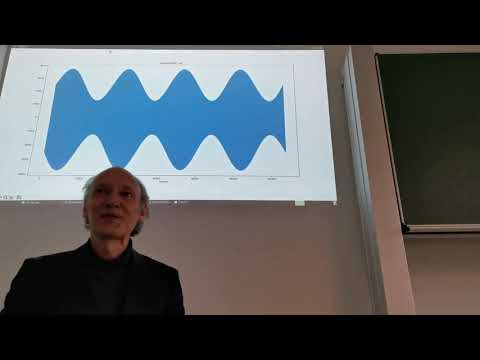

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('J2Vv3Rbdaho')

#**Modulation Types**

**How do we get our signal transmitted over the transmitter wave? We saw:**

- we can't give our signal (sound, video) directly to an antenna

- the wavelengths would be too long (Sound: some 1000 km, with  corresponing antenna dimensions)
- we would only have one station in this way

    → for transmission, much higher frequencies have to be selected
    → must be favorable for transmission and allow the selection of several stations

**How do we get our user information (bits of sound, video) on the transmitter (carrier) wave?**

• there are a number of possibilities

    → e. g. Amplitude Modulation (AM)

#**Amplitude Modulation (AM)**

- The transmitted information is in the amplitude of the transmitter wave

- Oldest type of modulation
      [Fessenden, ca. 1910-1929, first experiments with transmission of voice to ships. In the beginning, benefits were unclear!]

- But it is also part of digital modulation modes ("QAM")
      
- mathematical formulation:
        ◦ signal to be transmitted: $s(t),s(t)≤1$
        ◦ Carrier wave: $sin(ω_Tt)$	with ω_T as Carrier frequency
        ◦ Amplitude modulation:  Amplitude Modulation (AM)
    • The transmitted information is in the amplitude of the transmitter wave
    • Oldest type of modulation
      [Fessenden, ca. 1910-1929, first experiments with transmission of voice to ships. In the beginning, benefits were unclear!]
    • But it is also part of digital modulation modes ("QAM")
      
    • mathematical formulation:
        ◦ signal to be transmitted: 
        ◦ Carrier wave: 	with as Carrier frequency
        ◦ Amplitude modulation: 
        $1+s(t))⋅A⋅sin(ω_Tt)$
        → A in the equation mean amplitude of the carrier wave

**Why the "1" in $1+s(t))⋅A⋅sin(ω_Tt)$?**

to ensure that this value remains positive (to ensure a positive amplitude)

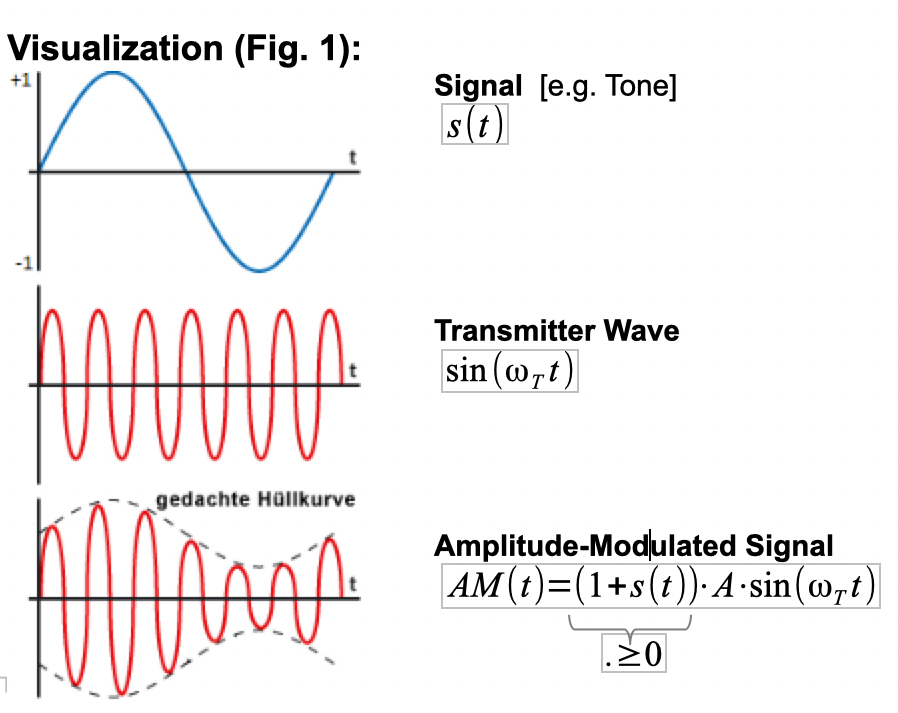

Quelle: www.elektronik-kompendium.de

###**What are the properties of this modulation?**

Mathematical re-formulation:

$$(1+s(t))⋅A⋅sin(ω_T⋅t)=A⋅sin(ω_T⋅t)+s(t)⋅A⋅sin(ω_T⋅t)$$

**We see**: his corresponds to a **mixture** of the (audio or video) signal  s(t) with carrier $A⋅sin(ω_T⋅t)$  (meaning we have 2 new frequencies: carrier plus and minus signal frequency), and an addition of the pure carrier.


###**How is AM demodulated in a receiver?**

####**Demodulation**
-  very simple (one of the advantages of AM)

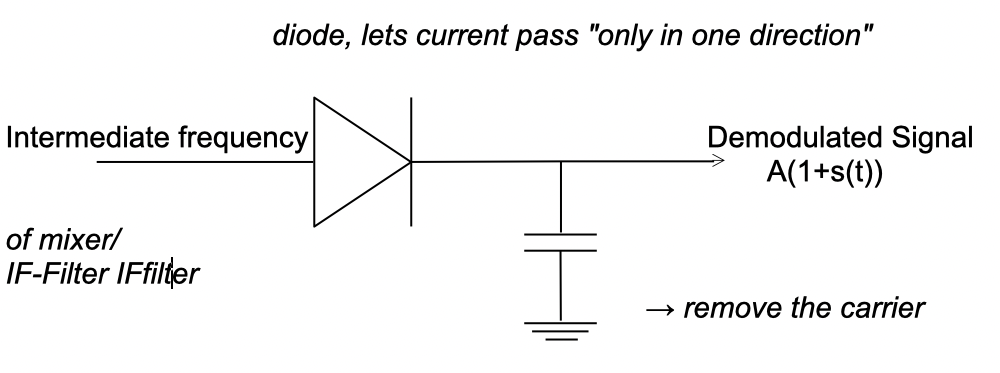

Note: the modulation appears unchanged, now on the baseband.

#**Characteristic curve of a diode**



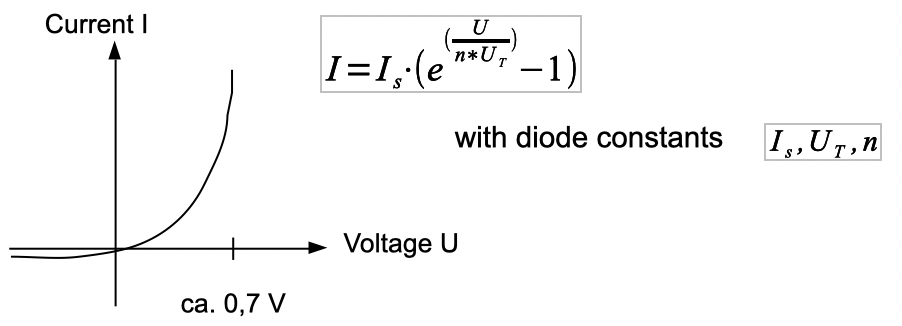

→ diode has an exponential characteristic, i. e. very strongly non-linear 


###**Clearly illustrated:**

####**After Diode:**

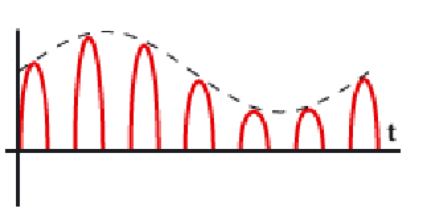

####**After lowpass filtering:**

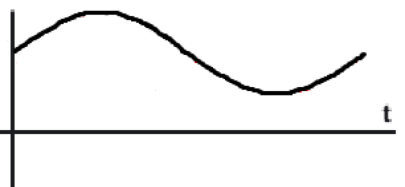

Note: very simple and precise reconstruction.

#**Alternative Mathematical Demodulation**
We down-mix by multiplying with a complex exponential (a rotating vector) at the carrier frequency, then low pass filters (LP) to remove the sum frequency, and then simply take the magnitude:

$(eq.1a)$

$$\begin{align*}
 |(LP(AM(t)⋅e^{j⋅ω_t⋅t}))| &= |(LP((1+s(t))⋅\frac{A}{2j}e^{j⋅ω_t⋅t}-e^{-j⋅ω_t⋅t})e^{j⋅ω_t⋅t})| \\
      &= |(LP((1+s(t))⋅\frac{A}{2j}e^{j⋅2ω_t⋅t}-e^{j⋅0⋅t}))| \\
      &= |(1+s(t))⋅\frac{A}{2j}(-1)| \\
      &= (1+s(t))⋅\frac{A}{2}
\end{align*}$$



This means that we have demodulated the signal $s(t)$ again. Observe that we also scaled it, as in diode demodulation, by the usually unknown factor  (depending on the signal strength in the receiver), and shifted it by the DC offset of 1. 

In software implementation, this demodulation can be implemented by two carrier oscillators, a cos and a sin oscillator, corresponding to the real and imaginary part of the complex exponential: $e^{j⋅ω_t⋅t}$

$(eq. 1b)$

$$\begin{align*}
 |(LP(AM(t)⋅e^{j⋅ω_t⋅t}))| &= |(LP(AM(t)⋅(cos(ω_T⋅n)+j⋅sin(ω_T⋅n))))| \\
      &= |(LP(AM(t)⋅cos(ω_T⋅n))+jLP(AM(t)⋅sin(ω_T⋅n))| \\
      &= \sqrt{(LP(AM(t)⋅cos(ω_T⋅n))^2+LP(AM(t)⋅sin(ω_T⋅n))^2}
\end{align*}$$

This last line can be implemented with real valued arithmetic (usual float types).

#**Characteristics**

##**What is the bandwidth of AM?**

**Initially**: We can split our payload signal (audio or video) s(t) into a sum of sine signals, e. g. with the help of a Fourier Transform. This applies to the sound and, as we have seen, also to images (spacial frequencies).

To find out the bandwidth, we can select one of these sine frequencies, e. g. the highest frequency.

$$(sin(ω_Tt)⋅sin(ω_St))=\frac{1}{2}(cos((ω_T-ω_S)t)-cos((ω_T+ω_S)t))$$

Let's call them $ω_s$ (angular frequency $ω_s=2πf_s$ )

#**Amplitude modulation with the highest payload frequency: $ω_s$:**

$$\begin{align*}
 (1+s(t))⋅A⋅sin(ω_Tt) &= (1+sin(ω_St))⋅A⋅sin(ω_Tt)\\
      &= sin(ω_Tt)+sin(ω_St)⋅sin(ω_Tt)⋅A \\
\end{align*}$$

$sin(ω_Tt)$ → Carrier

$sin(ω_St)⋅sin(ω_Tt)⋅A$ → Mult. by carriers with useful frequency

→ multiplication (mixing) of 2 sinusoidal terms: we obtain the sum and difference frequency

#**Illustration: Spectrum (Fig. 2)**

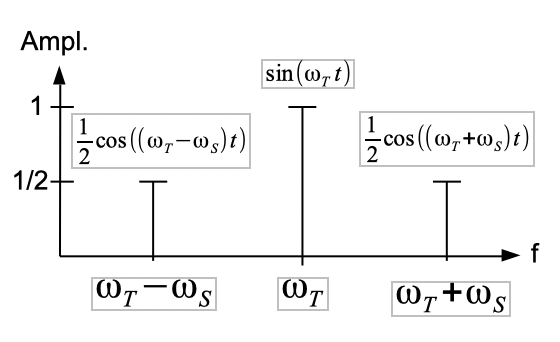

So: what is the bandwidth of the AM signal if the payload signal has a bandwidth of $ω_S$ ?

(i. e. signal frequencies from 0 to $ω_S$ )  	

**Answer**: **AM bandwidth is $2ω_S$!**
(Once above, once below the carrier)

Again **Demodulation**: Diode is strong non-linearity.
      
- If we give a signal as a sum of sinusoidal components to a non-linearity, there are interactions between these sinusoida components.
- Mathematical: if the diode characteristic curve is written as a Taylor series

     → Exponential function is well-known Taylor series:

  $$e^x=\sum_{n=0}^{∞}\frac{x^n}{n!}$$

    → also contains $x^2$ Term
- Square term of sum function contains multiplication between summands (x contains the sum of the carrier and the 2 sidebands):

$$(a+b)^2=a^2+2ab+b^2$$
      
      
→ here we get sine term multiplication again!

-  For AM we have (as seen) the frequencies:

  $ω_T, ω_T+ω_S, ω_T+ω_S$ (also	$sin(ω_T)$ ) 

- The multiplication mixes these components again and it results in 

$ω_T+ω_T+ω_S, ω_T+ω_S-ω_T...$


- Now the "interesting" parts have to be filtered out:
	→ Low-pass filter:

    • blocked: 	$ω_T+ω_T+ω_S$					← high frequencies 

    • passes:   $ω_T+ω_S-ω_T=ω_T+ω_S-ω_S$ 						← payload signal

	→ Mathematical reason why demodulation works with the diode:

-  Insight: Demodulation is actually a mixing of the AM signal with its own carrier! (shifting it to the base frequency of the signal)
         
- The carrier of AM (Term $sin(ω_Tt)$) has no own information! It is only needed for simple mixing in the receiver using a diode to keep the receiver simple!
        
- If we were to generate this frequency in the receiver, we would be able to do without this carrier.
          
- Omission of the carrier wave would have advantages:
            ▪  saved transmitter power
            ▪  reduced interference potential for e. g. neighboring stations

- Omission of the carrier in the transmitter is e.g. possible by omitting the DC offset term "1" in the modulation, which results in

     →  $sin(ω_st)⋅sin(ω_Tt)⋅A$      
      
- In this way, we only get the two sidebands with the actual payload signal. In the receiver we can demodulate the signal by multiplying with a locally generated carrier signal (a local oscillator).

Note: the local carrier frequency must be very accurate, otherwise there are frequency shifts of the demodulated signal!

→ makes receivers expensive.


#**7.2 Modulation – Python Example, Digital Transmission**

For our planned transmission of digital information via sound we need the library "pyaudio", and my library "sound. py", which is available in Moodle. 

Let's assume that we use a (carrier) tone with a frequency of **1000** oscillations per second (Hertz or **Hz**) at a sampling rate of 32000 samples per second (i. e. a sampling frequency of 32 kilo-Hertz or **kHz**).

First let's see how the 1 kHz tone sounds.  In order to generate its sampled values, we write in ipython --pylab for a tone lasting 2 seconds:


In [ ]:
import numpy as np

from sound import *

traeger = 10000*np.sin(2*np.pi/32000*1000*np.arange(0,64000));
#and listen to it:
sound(traeger,32000);




ModuleNotFoundError: ignored

Let's take a 2 second 2 Hz signal, which we want to modulate on this carrier with AM:  


In [ ]:
import numpy as np

ton = np.sin(2*np.pi/32000*2*np.arange(0,64000));

Note that we don't need to normalize our audio signal, because its value doesn't exceed 1.

To clarify the principle, we will multiply it by 0.5. 
The amplitude modulation is now called:

In [ ]:
import matplotlib.pyplot as plt

AM = (1+0.5*ton) * traeger;
#„*“ performs an element-wise multiplication here.

plt.plot(AM)

NameError: ignored

This shows the AM signal, which corresponds to Fig. (1) above:

Note that the signal to be transmitted appears as the envelope of the carrier. 

We can now listen to the AM signal:
sound(AM, 32000)

**Note**: We hear a carrier tone swelling up and down in time with the modulation.

This corresponds to the image that an oscilloscope would create in a hardware measurement.

With the code below you get a section of the beginning of the signal showing the carrier wave:

In [ ]:
plt.plot(AM[0:100])

NameError: ignored

Now we can calculate and plot the magnitude spectrum of the carrier, again with the command „fft“:

In [ ]:
sp= (np.abs(np.fft.fft (traeger))) #64000 samples
#We plot the first half of the spectrum:
plt.plot(sp[0:32000])

NameError: ignored

**Note**: In this case, the x-value 32000 corresponds to the Nyquist frequency, i. e. half of our sampling frequency of 16 kHz. Our carrier frequency of **1 kHz** therefore appears at the **x-value** of 
$1kHz/16kHz *32000=$ **2000**, where we can see the peak that represents our carrier in the spectrum.

Now we plot the spectrum of the modulated carrier:

In [ ]:
spAM= (np.abs(np.fft.fft(AM)))
plt.plot(spAM[0:32000]) 

NameError: ignored

This corresponds to Fig. (2) above.

The modulated **2 Hz** tone signal has a corresponding value of $2Hz/16000Hz * 32000=$ **4** on the x-axis.
We expect the sidebands to appear at distances of +- 4 from the carrier frequency. To see this, we have to zoom in accordingly:

In [ ]:
plt.plot(spAM[1950:2050])

NameError: ignored

We see: The sidebands indeed appear as sidebands at this distance around the carrier frequency.

#**Demodulation:**
For demodulation, we first mix (multiply) the AM signal with the above mentioned complex exponential of the carrier frequency (i. e. with sin and cos component) in order to mix it down to the center frequency zero (so-called direct conversion principle). This is basically the same as with diode demodulation, but here we just have the essential part, the mixing. Then we apply a low pass filter to remove possible other carriers at other frequencies and the sum frequency (the double carrier frequency). This is implementing eq. (1a) and (1b) above.

We did the modulation with:

In [ ]:
traeger = 10000*np.sin(2*np.pi/32000*1000*np.arange(0,64000));
ton = np.sin(2*np.pi/32000*2*np.arange(0,64000));
AM = (1+0.5*ton) * traeger;

In the decoder we now have:

Text(0.5, 0, 'sample')

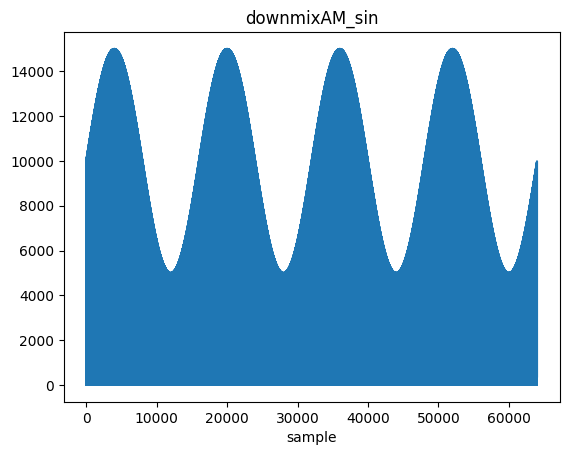

In [ ]:
traeger_sin = np.sin(2*np.pi/32000*1000*np.arange(0,64000));
downmixAM_sin=traeger_sin*AM
traeger_cos = np.cos(2*np.pi/32000*1000*np.arange(0,64000));
downmixAM_cos=traeger_cos*AM

#Example: Sine Part:
plt.plot(downmixAM_sin) 
plt.title('downmixAM_sin') 
plt.xlabel('sample') 

As you can see, the modulated signal is seen with a DC offset, since the carrier wave is moved down to zero and appears as DC. The sum frequency from this mixing is the high frequency signal that appears as continuous blue. We now have to remove the sum frequency through a **low pass filter**.

We had already seen a low-pass filter in the color component down-sampling, which we had obtained by setting the coefficients of high frequencies, in the frequency domain of the FFT or DCT, **to zero with a mask**. We had seen that we got the same result when we transformed the mask back to the original domain, and convolved the result (the filter) with the image.
Python has a very practical library that can design a digital **low pass filter** for use in the **time or space domain**. 

The low pass filter should have a cutoff frequency larger than the highest expected signal frequencies that we modulated the AM signal with, and lower than the carrier frequency.
Since our signal has 2 Hz, and the carrier frequency is 1 kHz, we can choose the **cut-off frequency** for the low pass as 500 Hz. 
The **sampling rate** is 32000 Hz, so the **Nyquits frequency** is 16000 Hz. 
So the cutoff frequency normalized to the Nyquist frequency is: 500.0/16000 (used by our filter design function).

In Python we use the filter design function "iirfilter", which designs digital filters with **infinite impulse response**, i. e. the filter has an infinitely long impulse response, which is a similar to analog filters, like the RC element in diode demodulation. This function expects as one of its arguments the cutoff frequency normalized to the Nyquist frequency.

Text(0.5, 0, 'Normalisierte Frequenz (Pi ist Nyquist-Frequenz)')

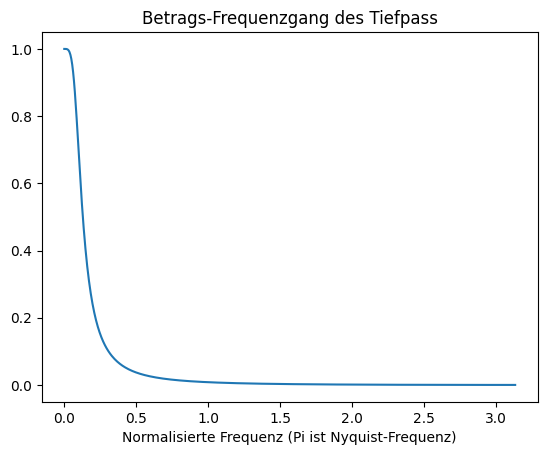

In [ ]:
from scipy.signal import * 

[b,a]=iirfilter(2, 500.0/16000,rs=60,btype='lowpass') 
#b and a contain our filter coefficients.
#The resulting frequency response of this filter creates the function "freqz": 
[w,h]=freqz(b,a) 
plt.plot(w,abs(h))
plt.title('Betrags-Frequenzgang des Tiefpass') 
plt.xlabel('Normalisierte Frequenz (Pi ist Nyquist-Frequenz)') 

Note: Our cut-off frequency of the low pass was 500 Hz at 16 kHz Nyquist frequency. With normalization to Pi as the Nyquist frequency in the plot,
500.0/16000*pi=0.098174..., i. e. approx. 0.1, which is very close to the observed plot of the magnitude frequency response above.

In order to be able to see the attenuation in the stop band better, we plot the vertical axis of the magnitude logarithmically, using a conversion into decibels (dB). We interpret our signal as voltage or current and therefore take the factor 20 in the dB conversion, dB (abs (x))=20*log10 (abs (x)).
A -80 dB attenuation is sufficient for our purposes (it corresponds to a factor of $10^{-4}$) so we can limit our vertical scale to it with the command "axis ([xmin, xmax, ymin, ymax])".


Text(0, 0.5, 'dB')

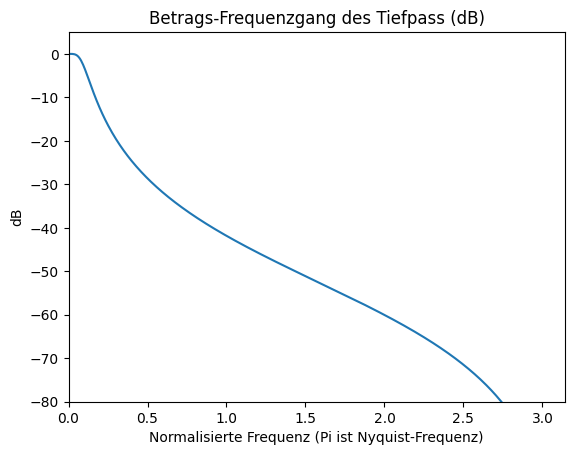

In [ ]:
plt.plot(w,20*np.log10(abs(h)))
plt.axis([0,3.14,-80,5])
plt.title('Betrags-Frequenzgang des Tiefpass (dB)') 
plt.xlabel('Normalisierte Frequenz (Pi ist Nyquist-Frequenz)') 
plt.ylabel('dB') 


**As we can see**: On the dB scale, there is only a relatively slow increase in attenuation to the high frequencies, but it should be sufficient for our purposes, because we do not have to suppress any neighbouring carriers.

We now apply this filter to the two mixed signals downmixAM_sin and downmixAM_cos, and then calculate the magnitude:

Text(0.5, 0, 'Sample')

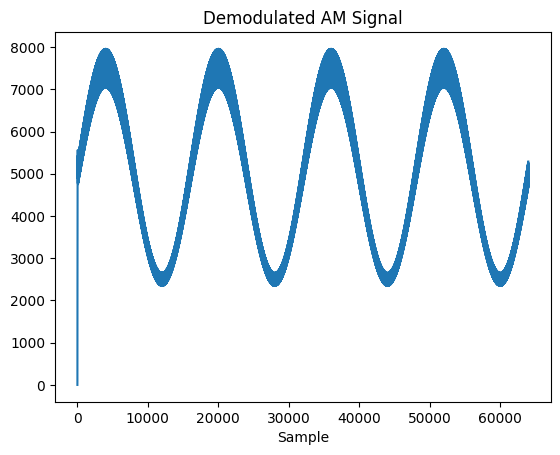

In [ ]:
#Real and imaginary part:
lowpassdownmixAM_sin=lfilter(b,a,downmixAM_sin)
lowpassdownmixAM_cos=lfilter(b,a,downmixAM_cos)
#magnitude:
lowpassdownmixAM=np.sqrt(lowpassdownmixAM_sin**2+lowpassdownmixAM_cos**2)
plt.plot(lowpassdownmixAM)
plt.title('Demodulated AM Signal')
plt.xlabel('Sample')

**We see**: We indeed get our signal (1+s (t)) back with a scale factor, but with a remaining carrier of double frequency (the thick, fuzzy blue line), because of the limited attenuation of our low pass filter.

**Note**: In this simulation, the **cosine carrier** would not be necessary for demodulation, since the sine carrier already has the exact same phase as in the transmitter. But during a transmission you get unknown transmission delays, and thus unknown phase shifts, which makes the cosine carrier important.

#**Python example for digital AM image transmission**

We would like to transmit our binary files from our image-coder via sound and amplitude modulation. For testing, we take a short example bit sequence and write it into a test file. Within python interactive mode (by starting „ipython“ or just „python“) we import our python file, which means we load all the function inside (don‘t execute them yet), and then execute the desied function in the interactive shell:

We use our python library:

    python

    from writereadbits import *

    writebinaryfile('test.bin','1010101011111111')

We can view the binary contents of the file from the linux terminal (not the python interactive mode) with the command:

    xxd -b test.bin

where we can indeed recognize our bit sequence after the line number.

For our transmission we will read in the file again, we now use a different function in the interactive mode:

    python

    from writereadbits import *

    bitstring=readbinaryfile('test.bin')


The bits from the file are then **modulated on 2 carriers using AM**. Our information bits are modulated on the carrier with **1 kHz**, to make it audible and to allow transmission over a speaker and a microphone. In wireless communication, this would a much higher carrier frequency, for instance at several 100 MHz! (Where we would also get a higher bit rate)

For the modulation, the „0“-bits get the signal value 0, and the „1“-bits get a fixed, high value. The length of the bits depends on the desired transmission speed or bit rate. This sequence of the bits is modulated directly on the carriers (i. e. multiplied). The addition of the 1 for Amplitude Modulation is not necessary here as the bit signal is already positive. 

Additionally we use a second carrier at **2 kHz**, which transmits a so called "**clock**" signal. The clock signal changes from 1 to 0 if a new valid bit is present on the **1 kHz** carrier. Otherwise we might have problems determining where a bit starts and ends.
The amplitude-modulated signal of bits and clock is stored in the sound file 
*'amfile.wav':*

    python AMcomm.py

Listen to the AM sound file with:

    play amfile.wav

(The "sox" program from the software manager must be installed)

or with our Python program *"pyplayfile. py":*

    python pyplayfile.py amfile.wav

This sound file can be played back by the transmitting device (e. g. a Raspberry Pi or Smartphone) and recorded by the receiving device, e. g.  On our laptop with our Python program "*pyrecaudiofile. py*":

    python pyrecaudiofile.py amrecfile.wav

Again we can listen to the result with:

    python pyplayfile.py amrecfile.wav

The following program reads this received sound file and demodulates it, displays the decoded data and saves it in the file '*AMdecoded.bin*':

    python AMdecoderbitstring.py amrecfile.wav

**Note**: The separation of clock and bit signal is not perfect, due to our imperfect filters, but sufficient for our purposes. Even after an acoustic transmission most of the bits can still be decoded, although we can observe that the waveform has changed considerably!

Take a look at the decoded bits in the Linux terminal shell with,

    xxd -b AMdecoded.bin

If we are lucky, this is the exact same as for the modulator.

#####**Experiment 2**:
Since *AMcomm.py* accepts arbitrary files, we can also take a small text file, *test.txt*.

View the file with:

    gedit test.txt

we see the text in the editor, and display the file content with:

    xxd -b test.txt

we can see the binary signs and the text.

In our program AMcomm.py we modify the line to read the input file:

    bitstring=readbinaryfile ('test.txt')

and then execute the Amplitude Modulation with:

    python AMcomm.py

Then we transfer the sound file by playing it back to a speaker and recording it with a microphone. In „*pyrecaudiofile.py*“ we have to extend the recording time to 12s, with the line:

    RECORD_SECONDS = 12

For the transmitter we execute:

    python pyplayfile.py amfile.wav

For the receiver:

    python pyrecaudiofile.py amrecfiletext.wav

Then we start the demodulation process with

    python AMdecoderbitstring.py amrecfiletext.wav

The demodulated information is now in the file "*AMdecoded. bin*". See decoded text with,
 
    gedit AMdecoded.bin

and 

    xxd -b AMdecoded.bin

As we can see, *AMdecoded.bin* might be identical to the file *test.txt*!

#**Modulation - Pointer diagram**

##**Spectrum of the payload signal:**



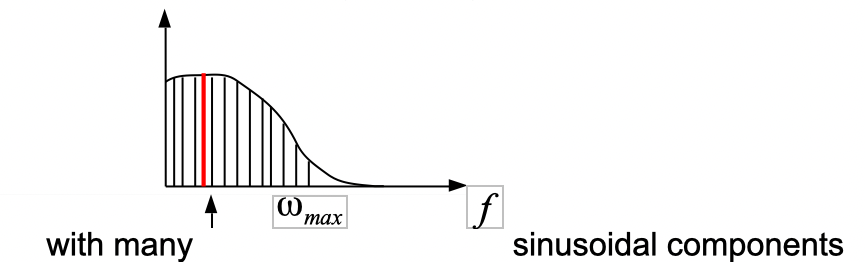

##**Amplitude-modulated Signal:**



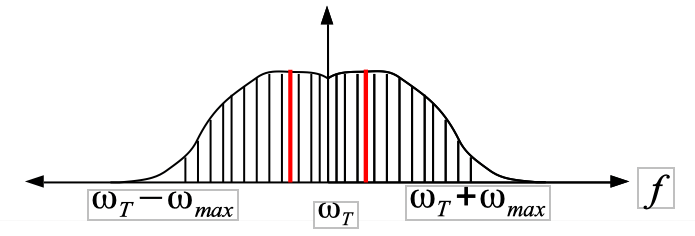

Note: The bandwidth of the AM signal is twice as large as the bandwidth of the baseband signal (the payload signal to be modulated onto the carrier), because of the 2 mirror identical sidebands.

###**Example AM Band Broadcast:**
AM signal has a bandwidth of 8 kHz

→ Payload audio signal has 4 kHz bandwidth 

This also means that the bandwidth of the payload signal is limited by the bandwidth of the transmission channel (half of the transmission channel).

Medium wave Europe: Channel spacing 9 kHz. To increase the audio bandwidth, adjacent transmitters should be far away to allow wider transmissions despite the narrow channel spacing.

But: Most receivers only have a bandpass of 9 kHz, which means we get an audio signal with only 4.5 kHz bandwidth, even though many stations transmit at a higher bandwidth. This is only slightly wider than telephone speech (3.5 kHz).

The reason for the low bandwidth is that medium wave is at relatively low frequencies (550-1600 kHz), hence the band is relatively narrow, and the narrow band spacing accommodates as many stations as possible. 

Observe that in Germany the public AM stations are shut down, because of dwindling audiences, because of the resulting poor audio quality.

Television application: AM is used for the transmission of Luminance information.

TV: Baseband: approx. 5 MHz for luminance

    → considerable bandwidth, larger than e. g. the whole medium wave band

    → Need wider band→ need higher frequencies:

2 VHF bands: 45 - 68 MHz, 175-225 MHz
1 UHF band: 470 - 800 MHz→ 330 MHz bandwidth for the band,
	7 MHz for each channel→ 47 channels

Especially in the UHF band the used bandwidth is available.

Channel spacing in the UHF band: 7 MHz (UHF = Ultra-High-Frequency)

But: AM with video bandwidth of 5 MHz results in 10 MHz bandwidth

→ too much

Solution: Filter one of the two AM sidebands (the lower one) so that only a small rest remains.

→  **Residual Sideband Modulation**

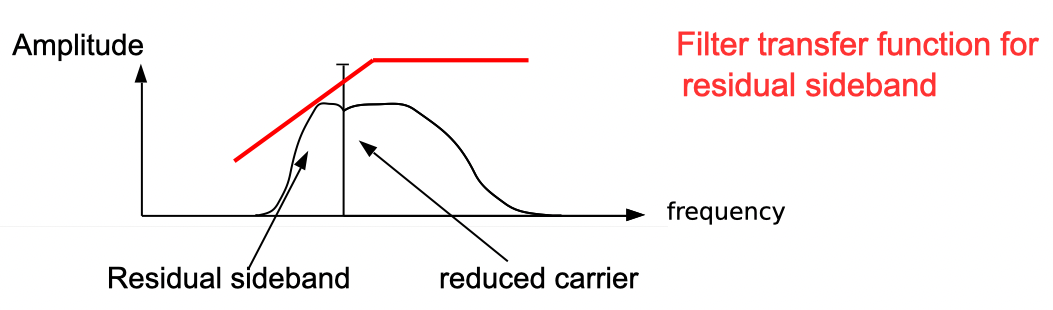

→ By filtering: reduces bandwidth so that the signal fits over the channel, but user information remains the same, is completely in the upper sideband.

→ Could also be used for AM broadcasting. But since new standards would be needed (new receivers), going to digital broadcasting (**DRM** or similar) makes more sense.

Residual sideband modulation is an easy way to reduce bandwidth and still keep the receiver simple. But there are other, more efficient possibilities.

We use Euler's formula again for an analys:

$$sin(ω_Tt)=ℑ(e^{jω_Tt})$$

$$e^{jω_Tt}=cos(ω_Tt)+j⋅sin(ω_Tt)$$

###**Illustration in the complex domain:**

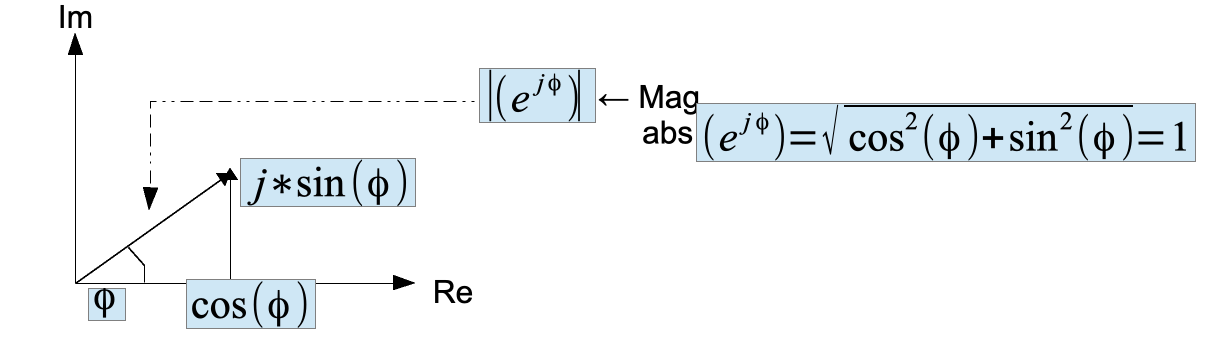

This mathematical formulation can be used to describe AM demodulation by using the „abs“ value (which we have already used for demodulation software in Python), because, the abs value corresponds to the amplitude or envelope of our signal.

Since our signal to modulate s (t) is assumed to be real-valued, amplitude modulation is: 

$$(1+s(t))⋅sin(ω_Tt)=ℑ((1+s(t))e^{jω_Tt})$$

and the demodulation with „abs“ (real-value):

$$|(1+s(t))e^{jω_Tt})|=(1+s(t))$$

A sinusoidal component in s (t) can be represented in a similar way: 

$$s(t)=sin(ω_st)=\frac{1}{2j}(e^{jω_st}-e^{-jω_st})$$

The AM Signal is then the imaginary part of the complex modulation: 

$$ ℑ((1+\frac{1}{2j}(e^{jω_st}-e^{-jω_st}))e^{jω_Tt} = ℑ((e^{jω_Tt}+\frac{1}{2j}(e^{j(ω_T+ω_s)t}-e^{-j(ω_T - ω_s)t})))
$$

where:

$jω_Tt$ → Carrier

$ω_T+ω_s$ → Upper Sideband

$ω_T - ω_s$ → Lower Sideband


Looking at the formula we can represent it by 3 pointers:

$e^{jω_Tt}$ : Rotating pointer with the angular frequency of the carrier (fast)

$e^{j(ω_T+ω_S)t},e^{j(ω_T-ω_S)t}$ :  Pointers of the sidebands, the first turns faster, second rotates slower than carrier pointer.

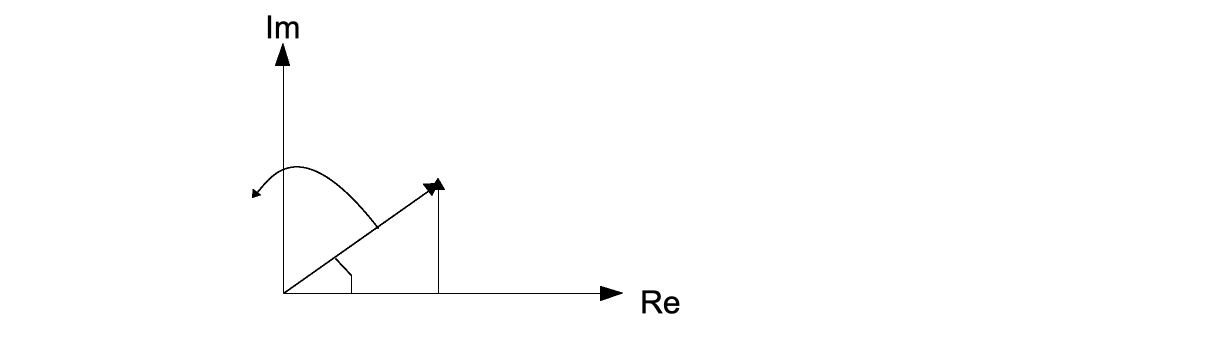

Projection on the imaginary axis results in sine function of the carrier. 

How do the sideband signal pointers behave relative to the carrier pointer?

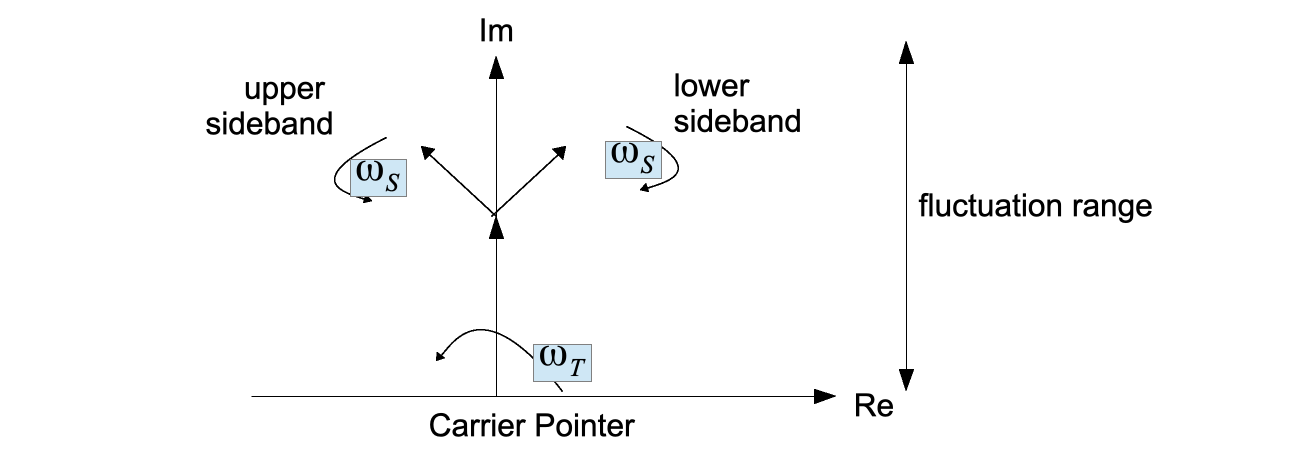

Note: The absolute value calculation during demodulation is identical to the imaginary part, since the real parts of the two sidebands cancel each other out.

In the case of (fictional) imaginary part calculation, only one of the sidebands would be sufficient for correct demodulation.

Residual sideband modulation: the lower sideband is reduced


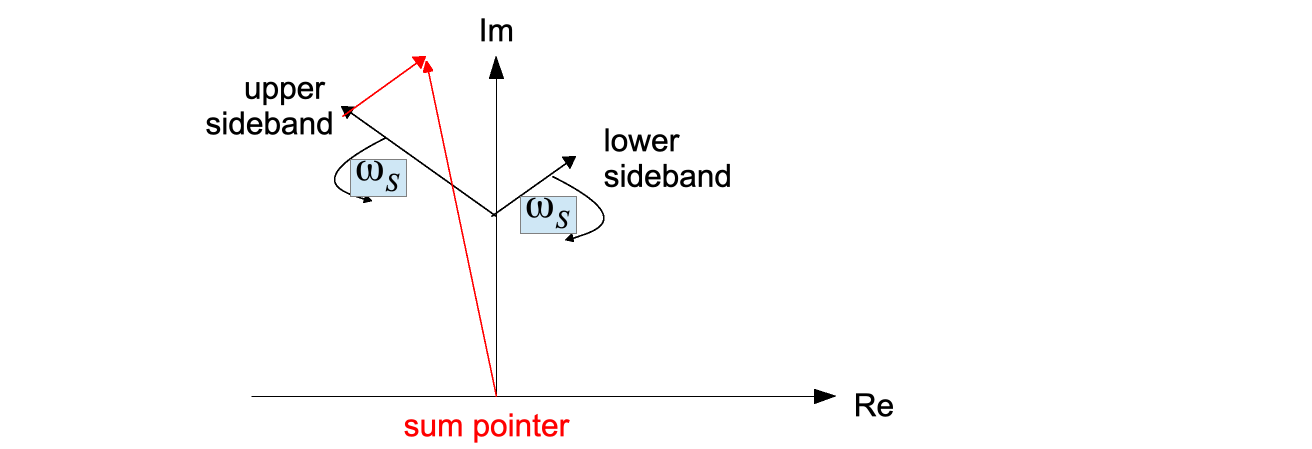

→ **Real parts do not cancel each other out!**

→ „Abs“ value (envelope for diode demodulation) is no longer equal to 
     the (actually correct) imaginary part, as in 2 complete sidebands

→  Slight distortion during diode demodulation!

→  These distortions can be compensated by the transmitter as they are known (pre-distortion)

Note: The AM is independent of the phase of the pointer of the carrier wave due to the „abs“ or magnitude demodulation.

→ AM demodulation is independent of the phase position of the carrier. 

Example: it doesn't matter if a sin or cos function is used for the carrier (a 90° phase difference)

→ How can we solve the remaining problems of AM?

→ Carrier (not really necessary for information transmission)

→ Double sideband (inefficient bandwidth)

AM **with** carrier: 	$(1+s(t))sin(ω_Tt)$

AM **without** carrier:  $s(t))sin(ω_Tt)$
→ no more „1“!